# Лабораторная работа №1
## по предмету "оптимальное управление"
```
Выполнил: студент гр. А-14м-16 Мигаль И.А
Проверил: Зубков Павел Валерьевич
```

In [ ]:
import sys
sys.path.insert(0, '/home/ivmig/OneDrive/Documents/A-14m-16/2CURSE3SEM/optimal_control/lab_1/')
print(sys.path)

In [1]:
print(__doc__)

# Author: Ivan Migal ivan.migal@mail.ru
# License: BSD 3 clause

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from matplotlib import colors as mcolors
import utils

from utils import array
from utils import TDMA


colors = list(mcolors.BASE_COLORS)
colors += list(mcolors.CSS4_COLORS.keys())

Automatically created module for IPython interactive environment


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 12, 12
plt.style.use('ggplot')
# Настройка шрифта
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

---
# Инициализация данных
```
    Обозначения см. в описании Л.Р. №1
    
```

In [3]:
# Словарь параметров
p_d = {}

In [4]:
# Заданные положительные величины
p_d['a'], p_d['l'], p_d['v'], p_d['T'] = 1., 1., 5., 2.

# Решение тестового примера
def x(s, t):
    return math.sin(t) + math.sin(s + math.pi / 2.)

# Плотность источников тепла
def f(s, t):
    return math.cos(t) + p_d['a'] ** 2 * math.sin(s + math.pi / 2.)
    
# Температура внешней среды
def p(t):
    #return 1. / p_d['v'] * math.cos(p_d['l'] + math.pi / 2) + math.sin(t) + math.sin(p_d['l'] + math.pi / 2)
    return 0.
    
# Распределение температуры в начальный момент времени
def fi(s):
    return math.sin(s + math.pi / 2.)

p_d['p(t)'] = p

p_d['f(s, t)'] = f

# Заданные числа
p_d['p_min'], p_d['p_max'], p_d['R'] = -100., 100., 100.

p_d['fi(s)'] = fi

# Желаемое распределение температуры
def y(s):
    #return s * math.sin(s + math.pi / 2.)
    return math.sin(p_d['T']) + math.sin(s + math.pi / 2.)

p_d['y(s)'] = y

# Число точек на пространственной и временной сетке соответственно
N = 10
p_d['N'], p_d['M'] = N, 10 + N * N

# Шаг на пространственной и временной сетке соответственно
p_d['dh'], p_d['dt'] = p_d['l'] / p_d['N'], p_d['T'] / p_d['M']
p_d['l'], p_d['T'], p_d['dh'], p_d['dt']

(1.0, 2.0, 0.1, 0.01818181818181818)

---
# Создание модели и управление

In [5]:
model = utils.Lab1OptCtrlModel(p_d)

In [6]:
criterion = utils.criterion_3
get_alpha = utils.get_alpha_5

In [7]:
model.solve(criterion, get_alpha, eps=10**-5)

90909.09090909091
58.3835767105
203.08791775
276.73552661
152.471467
34.5887712484
2.80646878509
0.0676551392705
0.0031511487849
0.00273430891686
0.00238431578774
0.00209777008716
0.00186168045169
0.00166472148593
0.0014985118069
0.00135682995195
0.0012349808404
0.00112936216888
0.00103716839062
0.000956185111433
0.000884643531668
0.000821115535584
0.00076443683616
0.000713649837573
0.000667960585743
0.000626705936783
0.000589328238443
0.000555355605278
0.000524386406705
0.000496076961804
0.000470131699058
0.000446295228132
0.00042434590743
0.000404090591067
0.000385360312689
0.000368006718655
0.000351899104505
0.000336921940117
0.000322972793001
0.000309960577738
0.000297804073982
0.000286430666665
0.000275775270952
0.00026577941142
0.000256390430594
0.000247560806352
0.000239247561348
0.000231411750481
0.000224018014781
0.000217034192033
0.000210430975983
0.000204181617311
0.000198261660602
0.000192648712411
0.000187322236298
0.000182263371285
0.000177454770721
0.000172880458961
0.00

3.64268909543e-05
3.64016623549e-05
3.63765080845e-05
3.63514276709e-05
3.63264206468e-05
3.63014865493e-05
3.627662492e-05
3.62518353049e-05
3.62271172546e-05
3.62024703239e-05
3.61778940716e-05
3.61533880613e-05
3.61289518602e-05
3.61045850401e-05
3.60802871765e-05
3.60560578491e-05
3.60318966416e-05
3.60078031414e-05
3.59837769401e-05
3.59598176328e-05
3.59359248186e-05
3.59120981003e-05
3.58883370842e-05
3.58646413805e-05
3.58410106029e-05
3.58174443685e-05
3.57939422982e-05
3.57705040161e-05
3.57471291499e-05
3.57238173306e-05
3.57005681925e-05
3.56773813734e-05
3.56542565142e-05
3.5631193259e-05
3.56081912552e-05
3.55852501533e-05
3.5562369607e-05
3.55395492729e-05
3.55167888108e-05
3.54940878834e-05
3.54714461565e-05
3.54488632987e-05
3.54263389815e-05
3.54038728795e-05
3.53814646699e-05
3.53591140326e-05
3.53368206507e-05
3.53145842097e-05
3.52924043978e-05
3.52702809061e-05
3.52482134281e-05
3.52262016601e-05
3.52042453009e-05
3.51823440519e-05
3.5160497617e-05
3.51387057026e-

2.89517418192e-05
2.89408377977e-05
2.89299470678e-05
2.89190695985e-05
2.89082053589e-05
2.88973543183e-05
2.8886516446e-05
2.88756917115e-05
2.88648800842e-05
2.8854081534e-05
2.88432960305e-05
2.88325235437e-05
2.88217640435e-05
2.88110175001e-05
2.88002838835e-05
2.87895631643e-05
2.87788553127e-05
2.87681602994e-05
2.87574780948e-05
2.87468086699e-05
2.87361519953e-05
2.87255080421e-05
2.87148767812e-05
2.87042581839e-05
2.86936522213e-05
2.86830588649e-05
2.8672478086e-05
2.86619098562e-05
2.86513541472e-05
2.86408109307e-05
2.86302801785e-05
2.86197618626e-05
2.8609255955e-05
2.85987624279e-05
2.85882812535e-05
2.85778124041e-05
2.85673558521e-05
2.85569115701e-05
2.85464795307e-05
2.85360597066e-05
2.85256520706e-05
2.85152565956e-05
2.85048732545e-05
2.84945020206e-05
2.84841428668e-05
2.84737957666e-05
2.84634606932e-05
2.84531376202e-05
2.8442826521e-05
2.84325273693e-05
2.84222401388e-05
2.84119648032e-05
2.84017013366e-05
2.83914497129e-05
2.83812099062e-05
2.83709818905e-

2.49545706514e-05
2.49476841856e-05
2.49408033627e-05
2.49339281741e-05
2.49270586114e-05
2.49201946663e-05
2.49133363304e-05
2.49064835953e-05
2.48996364527e-05
2.48927948942e-05
2.48859589116e-05
2.48791284965e-05
2.48723036407e-05
2.48654843359e-05
2.4858670574e-05
2.48518623466e-05
2.48450596456e-05
2.48382624629e-05
2.48314707902e-05
2.48246846194e-05
2.48179039424e-05
2.48111287511e-05
2.48043590374e-05
2.47975947932e-05
2.47908360106e-05
2.47840826813e-05
2.47773347975e-05
2.4770592351e-05
2.47638553341e-05
2.47571237386e-05
2.47503975566e-05
2.47436767802e-05
2.47369614016e-05
2.47302514127e-05
2.47235468057e-05
2.47168475727e-05
2.4710153706e-05
2.47034651977e-05
2.46967820399e-05
2.46901042249e-05
2.46834317449e-05
2.46767645921e-05
2.46701027588e-05
2.46634462374e-05
2.46567950199e-05
2.46501490989e-05
2.46435084665e-05
2.46368731152e-05
2.46302430372e-05
2.4623618225e-05
2.4616998671e-05
2.46103843676e-05
2.46037753071e-05
2.4597171482e-05
2.45905728849e-05
2.4583979508e-05

2.22490398556e-05
2.22440997722e-05
2.22391627859e-05
2.22342288932e-05
2.22292980907e-05
2.22243703749e-05
2.22194457424e-05
2.22145241896e-05
2.22096057133e-05
2.22046903098e-05
2.21997779759e-05
2.2194868708e-05
2.21899625027e-05
2.21850593567e-05
2.21801592665e-05
2.21752622286e-05
2.21703682398e-05
2.21654772966e-05
2.21605893957e-05
2.21557045335e-05
2.21508227069e-05
2.21459439123e-05
2.21410681465e-05
2.2136195406e-05
2.21313256875e-05
2.21264589877e-05
2.21215953032e-05
2.21167346307e-05
2.21118769668e-05
2.21070223083e-05
2.21021706517e-05
2.20973219938e-05
2.20924763313e-05
2.20876336608e-05
2.20827939791e-05
2.20779572828e-05
2.20731235687e-05
2.20682928335e-05
2.20634650739e-05
2.20586402866e-05
2.20538184684e-05
2.2048999616e-05
2.20441837261e-05
2.20393707954e-05
2.20345608209e-05
2.20297537991e-05
2.20249497269e-05
2.20201486009e-05
2.20153504181e-05
2.20105551752e-05
2.20057628689e-05
2.2000973496e-05
2.19961870534e-05
2.19914035378e-05
2.1986622946e-05
2.19818452749e-

2.02335589741e-05
2.02297623341e-05
2.02259676337e-05
2.0222174871e-05
2.02183840443e-05
2.02145951519e-05
2.0210808192e-05
2.02070231629e-05
2.02032400629e-05
2.01994588902e-05
2.0195679643e-05
2.01919023197e-05
2.01881269185e-05
2.01843534377e-05
2.01805818755e-05
2.01768122303e-05
2.01730445003e-05
2.01692786838e-05
2.01655147791e-05
2.01617527844e-05
2.01579926981e-05
2.01542345185e-05
2.01504782437e-05
2.01467238723e-05
2.01429714023e-05
2.01392208322e-05
2.01354721602e-05
2.01317253846e-05
2.01279805038e-05
2.01242375161e-05
2.01204964196e-05
2.01167572129e-05
2.01130198942e-05
2.01092844617e-05
2.01055509139e-05
2.0101819249e-05
2.00980894654e-05
2.00943615614e-05
2.00906355353e-05
2.00869113855e-05
2.00831891102e-05
2.00794687079e-05
2.00757501768e-05
2.00720335153e-05
2.00683187218e-05
2.00646057945e-05
2.00608947319e-05
2.00571855322e-05
2.00534781938e-05
2.00497727151e-05
2.00460690945e-05
2.00423673302e-05
2.00386674206e-05
2.00349693642e-05
2.00312731592e-05
2.0027578804e-

1.86734319971e-05
1.86703710572e-05
1.86673114452e-05
1.86642531601e-05
1.86611962009e-05
1.86581405665e-05
1.86550862559e-05
1.86520332682e-05
1.86489816024e-05
1.86459312574e-05
1.86428822322e-05
1.86398345259e-05
1.86367881374e-05
1.86337430658e-05
1.863069931e-05
1.86276568691e-05
1.86246157421e-05
1.86215759279e-05
1.86185374256e-05
1.86155002341e-05
1.86124643526e-05
1.860942978e-05
1.86063965153e-05
1.86033645575e-05
1.86003339057e-05
1.85973045588e-05
1.8594276516e-05
1.85912497761e-05
1.85882243382e-05
1.85852002014e-05
1.85821773646e-05
1.85791558269e-05
1.85761355873e-05
1.85731166449e-05
1.85700989986e-05
1.85670826475e-05
1.85640675905e-05
1.85610538269e-05
1.85580413554e-05
1.85550301753e-05
1.85520202855e-05
1.85490116851e-05
1.8546004373e-05
1.85429983484e-05
1.85399936103e-05
1.85369901576e-05
1.85339879895e-05
1.8530987105e-05
1.85279875031e-05
1.85249891828e-05
1.85219921433e-05
1.85189963834e-05
1.85160019024e-05
1.85130086992e-05
1.85100167729e-05
1.85070261226e-05

1.73733715842e-05
1.73708370829e-05
1.73683035371e-05
1.7365770946e-05
1.73632393092e-05
1.7360708626e-05
1.73581788957e-05
1.73556501177e-05
1.73531222914e-05
1.73505954162e-05
1.73480694914e-05
1.73455445165e-05
1.73430204908e-05
1.73404974137e-05
1.73379752846e-05
1.73354541028e-05
1.73329338678e-05
1.73304145788e-05
1.73278962354e-05
1.73253788369e-05
1.73228623827e-05
1.73203468721e-05
1.73178323045e-05
1.73153186794e-05
1.73128059961e-05
1.7310294254e-05
1.73077834525e-05
1.73052735909e-05
1.73027646688e-05
1.73002566854e-05
1.72977496401e-05
1.72952435324e-05
1.72927383616e-05
1.72902341271e-05
1.72877308283e-05
1.72852284647e-05
1.72827270355e-05
1.72802265403e-05
1.72777269783e-05
1.7275228349e-05
1.72727306518e-05
1.72702338861e-05
1.72677380512e-05
1.72652431466e-05
1.72627491717e-05
1.72602561258e-05
1.72577640084e-05
1.72552728189e-05
1.72527825566e-05
1.7250293221e-05
1.72478048115e-05
1.72453173274e-05
1.72428307682e-05
1.72403451333e-05
1.72378604221e-05
1.7235376634e-0

1.62863584595e-05
1.62842100876e-05
1.62820624332e-05
1.62799154961e-05
1.62777692758e-05
1.62756237719e-05
1.6273478984e-05
1.62713349116e-05
1.62691915543e-05
1.62670489119e-05
1.62649069837e-05
1.62627657694e-05
1.62606252687e-05
1.62584854811e-05
1.62563464061e-05
1.62542080434e-05
1.62520703926e-05
1.62499334532e-05
1.62477972249e-05
1.62456617072e-05
1.62435268998e-05
1.62413928022e-05
1.6239259414e-05
1.62371267348e-05
1.62349947643e-05
1.62328635019e-05
1.62307329473e-05
1.62286031001e-05
1.62264739599e-05
1.62243455263e-05
1.62222177988e-05
1.62200907771e-05
1.62179644608e-05
1.62158388494e-05
1.62137139426e-05
1.62115897399e-05
1.6209466241e-05
1.62073434455e-05
1.62052213529e-05
1.62030999628e-05
1.62009792749e-05
1.61988592888e-05
1.61967400039e-05
1.61946214201e-05
1.61925035367e-05
1.61903863536e-05
1.61882698701e-05
1.6186154086e-05
1.61840390009e-05
1.61819246143e-05
1.61798109259e-05
1.61776979352e-05
1.61755856418e-05
1.61734740455e-05
1.61713631457e-05
1.6169252942e-

1.53566427292e-05
1.53547890703e-05
1.5352935968e-05
1.53510834221e-05
1.53492314324e-05
1.53473799985e-05
1.53455291202e-05
1.53436787971e-05
1.5341829029e-05
1.53399798157e-05
1.53381311567e-05
1.53362830518e-05
1.53344355008e-05
1.53325885033e-05
1.53307420591e-05
1.53288961679e-05
1.53270508294e-05
1.53252060433e-05
1.53233618094e-05
1.53215181273e-05
1.53196749967e-05
1.53178324175e-05
1.53159903892e-05
1.53141489117e-05
1.53123079846e-05
1.53104676076e-05
1.53086277806e-05
1.53067885031e-05
1.53049497749e-05
1.53031115958e-05
1.53012739654e-05
1.52994368834e-05
1.52976003497e-05
1.52957643638e-05
1.52939289256e-05
1.52920940347e-05
1.52902596909e-05
1.52884258939e-05
1.52865926434e-05
1.5284759939e-05
1.52829277807e-05
1.5281096168e-05
1.52792651007e-05
1.52774345785e-05
1.52756046011e-05
1.52737751683e-05
1.52719462798e-05
1.52701179352e-05
1.52682901344e-05
1.5266462877e-05
1.52646361628e-05
1.52628099915e-05
1.52609843628e-05
1.52591592764e-05
1.52573347321e-05
1.52555107296e-

1.45487249764e-05
1.45471028642e-05
1.4545481195e-05
1.45438599687e-05
1.45422391849e-05
1.45406188437e-05
1.45389989446e-05
1.45373794875e-05
1.45357604722e-05
1.45341418985e-05
1.45325237663e-05
1.45309060752e-05
1.4529288825e-05
1.45276720157e-05
1.45260556469e-05
1.45244397185e-05
1.45228242302e-05
1.45212091819e-05
1.45195945734e-05
1.45179804044e-05
1.45163666747e-05
1.45147533842e-05
1.45131405326e-05
1.45115281197e-05
1.45099161454e-05
1.45083046093e-05
1.45066935114e-05
1.45050828515e-05
1.45034726292e-05
1.45018628444e-05
1.4500253497e-05
1.44986445866e-05
1.44970361132e-05
1.44954280764e-05
1.44938204762e-05
1.44922133122e-05
1.44906065844e-05
1.44890002924e-05
1.44873944361e-05
1.44857890153e-05
1.44841840298e-05
1.44825794794e-05
1.44809753638e-05
1.4479371683e-05
1.44777684366e-05
1.44761656245e-05
1.44745632465e-05
1.44729613023e-05
1.44713597919e-05
1.44697587149e-05
1.44681580712e-05
1.44665578606e-05
1.44649580828e-05
1.44633587378e-05
1.44617598252e-05
1.44601613449e

1.38419188549e-05
1.38404818447e-05
1.3839045195e-05
1.38376089055e-05
1.38361729762e-05
1.38347374068e-05
1.38333021973e-05
1.38318673474e-05
1.3830432857e-05
1.38289987261e-05
1.38275649543e-05
1.38261315415e-05
1.38246984877e-05
1.38232657927e-05
1.38218334562e-05
1.38204014782e-05
1.38189698584e-05
1.38175385968e-05
1.38161076932e-05
1.38146771475e-05
1.38132469594e-05
1.38118171288e-05
1.38103876557e-05
1.38089585397e-05
1.38075297809e-05
1.3806101379e-05
1.38046733338e-05
1.38032456453e-05
1.38018183132e-05
1.38003913375e-05
1.37989647179e-05
1.37975384544e-05
1.37961125467e-05
1.37946869947e-05
1.37932617983e-05
1.37918369574e-05
1.37904124716e-05
1.3788988341e-05
1.37875645654e-05
1.37861411446e-05
1.37847180784e-05
1.37832953668e-05
1.37818730095e-05
1.37804510065e-05
1.37790293575e-05
1.37776080624e-05
1.37761871211e-05
1.37747665334e-05
1.37733462992e-05
1.37719264183e-05
1.37705068905e-05
1.37690877158e-05
1.37676688939e-05
1.37662504248e-05
1.37648323082e-05
1.37634145441e

1.32114887496e-05
1.32102039054e-05
1.32089193593e-05
1.32076351113e-05
1.32063511611e-05
1.32050675088e-05
1.32037841541e-05
1.3202501097e-05
1.32012183373e-05
1.31999358749e-05
1.31986537098e-05
1.31973718417e-05
1.31960902706e-05
1.31948089964e-05
1.31935280189e-05
1.3192247338e-05
1.31909669537e-05
1.31896868657e-05
1.3188407074e-05
1.31871275784e-05
1.31858483789e-05
1.31845694754e-05
1.31832908676e-05
1.31820125555e-05
1.31807345391e-05
1.3179456818e-05
1.31781793924e-05
1.31769022619e-05
1.31756254266e-05
1.31743488863e-05
1.31730726409e-05
1.31717966902e-05
1.31705210342e-05
1.31692456728e-05
1.31679706057e-05
1.3166695833e-05
1.31654213545e-05
1.31641471701e-05
1.31628732796e-05
1.3161599683e-05
1.31603263801e-05
1.31590533708e-05
1.31577806551e-05
1.31565082327e-05
1.31552361037e-05
1.31539642678e-05
1.31526927249e-05
1.3151421475e-05
1.31501505179e-05
1.31488798535e-05
1.31476094818e-05
1.31463394025e-05
1.31450696155e-05
1.31438001208e-05
1.31425309183e-05
1.31412620078e-05

1.26524813687e-05
1.26513217911e-05
1.26501624641e-05
1.26490033878e-05
1.2647844562e-05
1.26466859867e-05
1.26455276618e-05
1.26443695871e-05
1.26432117626e-05
1.26420541882e-05
1.26408968638e-05
1.26397397893e-05
1.26385829647e-05
1.26374263897e-05
1.26362700644e-05
1.26351139886e-05
1.26339581623e-05
1.26328025854e-05
1.26316472577e-05
1.26304921792e-05
1.26293373498e-05
1.26281827694e-05
1.26270284379e-05
1.26258743553e-05
1.26247205213e-05
1.2623566936e-05
1.26224135993e-05
1.2621260511e-05
1.26201076711e-05
1.26189550795e-05
1.2617802736e-05
1.26166506407e-05
1.26154987933e-05
1.26143471939e-05
1.26131958423e-05
1.26120447385e-05
1.26108938823e-05
1.26097432736e-05
1.26085929125e-05
1.26074427987e-05
1.26062929322e-05
1.26051433129e-05
1.26039939407e-05
1.26028448155e-05
1.26016959373e-05
1.26005473059e-05
1.25993989213e-05
1.25982507833e-05
1.2597102892e-05
1.2595955247e-05
1.25948078485e-05
1.25936606964e-05
1.25925137904e-05
1.25913671305e-05
1.25902207167e-05
1.25890745489e-0

1.21378395665e-05
1.21367876709e-05
1.21357359881e-05
1.21346845181e-05
1.21336332607e-05
1.21325822159e-05
1.21315313837e-05
1.2130480764e-05
1.21294303566e-05
1.21283801615e-05
1.21273301787e-05
1.21262804081e-05
1.21252308495e-05
1.2124181503e-05
1.21231323685e-05
1.21220834458e-05
1.2121034735e-05
1.21199862359e-05
1.21189379484e-05
1.21178898726e-05
1.21168420083e-05
1.21157943554e-05
1.21147469139e-05
1.21136996838e-05
1.21126526649e-05
1.21116058571e-05
1.21105592605e-05
1.21095128748e-05
1.21084667002e-05
1.21074207364e-05
1.21063749834e-05
1.21053294412e-05
1.21042841096e-05
1.21032389886e-05
1.21021940782e-05
1.21011493782e-05
1.21001048886e-05
1.20990606093e-05
1.20980165403e-05
1.20969726814e-05
1.20959290326e-05
1.20948855939e-05
1.20938423651e-05
1.20927993462e-05
1.20917565371e-05
1.20907139378e-05
1.20896715481e-05
1.20886293681e-05
1.20875873976e-05
1.20865456365e-05
1.20855040848e-05
1.20844627425e-05
1.20834216094e-05
1.20823806855e-05
1.20813399707e-05
1.2080299465e

1.16705276941e-05
1.16695675072e-05
1.1668607503e-05
1.16676476814e-05
1.16666880423e-05
1.16657285857e-05
1.16647693115e-05
1.16638102197e-05
1.16628513102e-05
1.1661892583e-05
1.16609340379e-05
1.1659975675e-05
1.16590174941e-05
1.16580594952e-05
1.16571016783e-05
1.16561440434e-05
1.16551865902e-05
1.16542293189e-05
1.16532722292e-05
1.16523153213e-05
1.16513585949e-05
1.16504020501e-05
1.16494456868e-05
1.1648489505e-05
1.16475335045e-05
1.16465776853e-05
1.16456220474e-05
1.16446665908e-05
1.16437113152e-05
1.16427562208e-05
1.16418013074e-05
1.1640846575e-05
1.16398920235e-05
1.16389376529e-05
1.1637983463e-05
1.1637029454e-05
1.16360756256e-05
1.16351219778e-05
1.16341685107e-05
1.1633215224e-05
1.16322621179e-05
1.16313091921e-05
1.16303564467e-05
1.16294038815e-05
1.16284514966e-05
1.16274992919e-05
1.16265472673e-05
1.16255954228e-05
1.16246437583e-05
1.16236922737e-05
1.1622740969e-05
1.16217898442e-05
1.16208388991e-05
1.16198881338e-05
1.16189375481e-05
1.16179871421e-05
1

1.12472338643e-05
1.12463519605e-05
1.12454702151e-05
1.12445886281e-05
1.12437071995e-05
1.12428259293e-05
1.12419448173e-05
1.12410638635e-05
1.1240183068e-05
1.12393024305e-05
1.12384219512e-05
1.12375416299e-05
1.12366614666e-05
1.12357814612e-05
1.12349016138e-05
1.12340219242e-05
1.12331423924e-05
1.12322630183e-05
1.1231383802e-05
1.12305047434e-05
1.12296258423e-05
1.12287470988e-05
1.12278685129e-05
1.12269900844e-05
1.12261118134e-05
1.12252336997e-05
1.12243557434e-05
1.12234779444e-05
1.12226003026e-05
1.1221722818e-05
1.12208454905e-05
1.12199683202e-05
1.12190913069e-05
1.12182144506e-05
1.12173377512e-05
1.12164612088e-05
1.12155848232e-05
1.12147085945e-05
1.12138325225e-05
1.12129566073e-05
1.12120808488e-05
1.12112052468e-05
1.12103298015e-05
1.12094545127e-05
1.12085793804e-05
1.12077044045e-05
1.1206829585e-05
1.12059549219e-05
1.12050804151e-05
1.12042060646e-05
1.12033318702e-05
1.12024578321e-05
1.120158395e-05
1.12007102241e-05
1.11998366541e-05
1.11989632401e-0

1.08526777475e-05
1.08518648649e-05
1.08510521207e-05
1.08502395148e-05
1.08494270473e-05
1.08486147179e-05
1.08478025268e-05
1.08469904738e-05
1.0846178559e-05
1.08453667823e-05
1.08445551436e-05
1.08437436429e-05
1.08429322802e-05
1.08421210554e-05
1.08413099685e-05
1.08404990195e-05
1.08396882083e-05
1.08388775348e-05
1.08380669991e-05
1.08372566011e-05
1.08364463408e-05
1.08356362181e-05
1.0834826233e-05
1.08340163854e-05
1.08332066753e-05
1.08323971027e-05
1.08315876675e-05
1.08307783697e-05
1.08299692092e-05
1.08291601861e-05
1.08283513002e-05
1.08275425516e-05
1.08267339402e-05
1.08259254659e-05
1.08251171287e-05
1.08243089287e-05
1.08235008656e-05
1.08226929396e-05
1.08218851505e-05
1.08210774984e-05
1.08202699831e-05
1.08194626047e-05
1.08186553631e-05
1.08178482582e-05
1.08170412901e-05
1.08162344587e-05
1.0815427764e-05
1.08146212058e-05
1.08138147843e-05
1.08130084993e-05
1.08122023507e-05
1.08113963387e-05
1.08105904631e-05
1.08097847238e-05
1.08089791209e-05
1.08081736543

1.04935087391e-05
1.04927554882e-05
1.04920023593e-05
1.04912493522e-05
1.0490496467e-05
1.04897437037e-05
1.04889910621e-05
1.04882385423e-05
1.04874861442e-05
1.04867338678e-05
1.04859817131e-05
1.04852296801e-05
1.04844777686e-05
1.04837259787e-05
1.04829743103e-05
1.04822227634e-05
1.0481471338e-05
1.0480720034e-05
1.04799688515e-05
1.04792177903e-05
1.04784668504e-05
1.04777160319e-05
1.04769653346e-05
1.04762147586e-05
1.04754643037e-05
1.04747139701e-05
1.04739637576e-05
1.04732136662e-05
1.04724636959e-05
1.04717138466e-05
1.04709641184e-05
1.04702145111e-05
1.04694650248e-05
1.04687156594e-05
1.04679664149e-05
1.04672172913e-05
1.04664682884e-05
1.04657194064e-05
1.04649706451e-05
1.04642220045e-05
1.04634734847e-05
1.04627250854e-05
1.04619768069e-05
1.04612286489e-05
1.04604806114e-05
1.04597326945e-05
1.04589848981e-05
1.04582372222e-05
1.04574896667e-05
1.04567422316e-05
1.04559949169e-05
1.04552477225e-05
1.04545006484e-05
1.04537536946e-05
1.04530068611e-05
1.04522601477

1.0160781022e-05
1.01600803776e-05
1.01593798414e-05
1.01586794134e-05
1.01579790934e-05
1.01572788815e-05
1.01565787777e-05
1.01558787819e-05
1.0155178894e-05
1.01544791142e-05
1.01537794422e-05
1.01530798782e-05
1.01523804221e-05
1.01516810738e-05
1.01509818333e-05
1.01502827007e-05
1.01495836758e-05
1.01488847586e-05
1.01481859492e-05
1.01474872475e-05
1.01467886534e-05
1.0146090167e-05
1.01453917881e-05
1.01446935169e-05
1.01439953531e-05
1.0143297297e-05
1.01425993483e-05
1.01419015071e-05
1.01412037733e-05
1.01405061469e-05
1.0139808628e-05
1.01391112163e-05
1.01384139121e-05
1.01377167151e-05
1.01370196254e-05
1.0136322643e-05
1.01356257677e-05
1.01349289997e-05
1.01342323389e-05
1.01335357851e-05
1.01328393385e-05
1.0132142999e-05
1.01314467666e-05
1.01307506412e-05
1.01300546228e-05
1.01293587113e-05
1.01286629069e-05
1.01279672093e-05
1.01272716187e-05
1.01265761349e-05
1.01258807579e-05
1.01251854878e-05
1.01244903245e-05
1.01237952679e-05
1.0123100318e-05
1.01224054749e-05


In [8]:
model.final_step

9040

In [9]:
X_ = np.arange(0., p_d['l'] + p_d['dh'], p_d['dh'])
Y_ = np.arange(0., p_d['T'] + p_d['dt'], p_d['dt'])

---
# Процесс управления

In [10]:
y_s = model.y_arr
bounds = [min(min(y_s), min(model.x_arr[-1][-1,:])), max(max(y_s), max(model.x_arr[-1][-1,:]))]

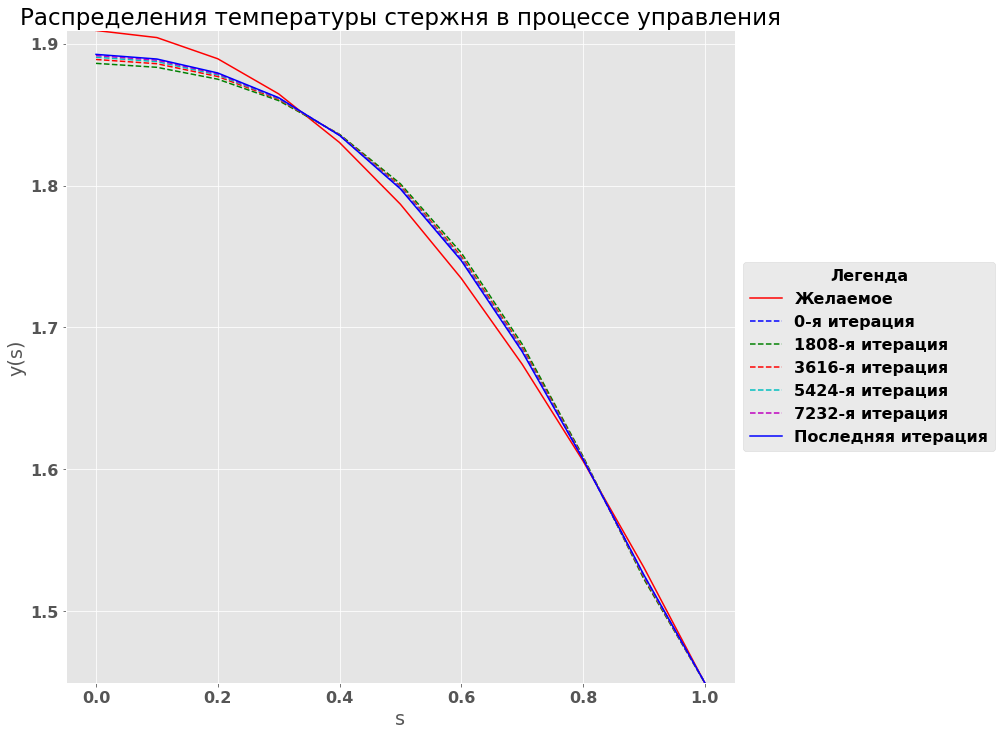

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', label='Желаемое')
part = 1
count = 5
step = int(model.final_step / count / part)
for i in range(0, int(model.final_step / part), step):
    ax.plot(X_, model.x_arr[i][-1,:], color=colors[int(i / step)], linestyle='--', label='{}-я итерация'.format(i))
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Последняя итерация')
ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Распределения температуры стержня в процессе управления')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Желаемое и полученное распределение температур

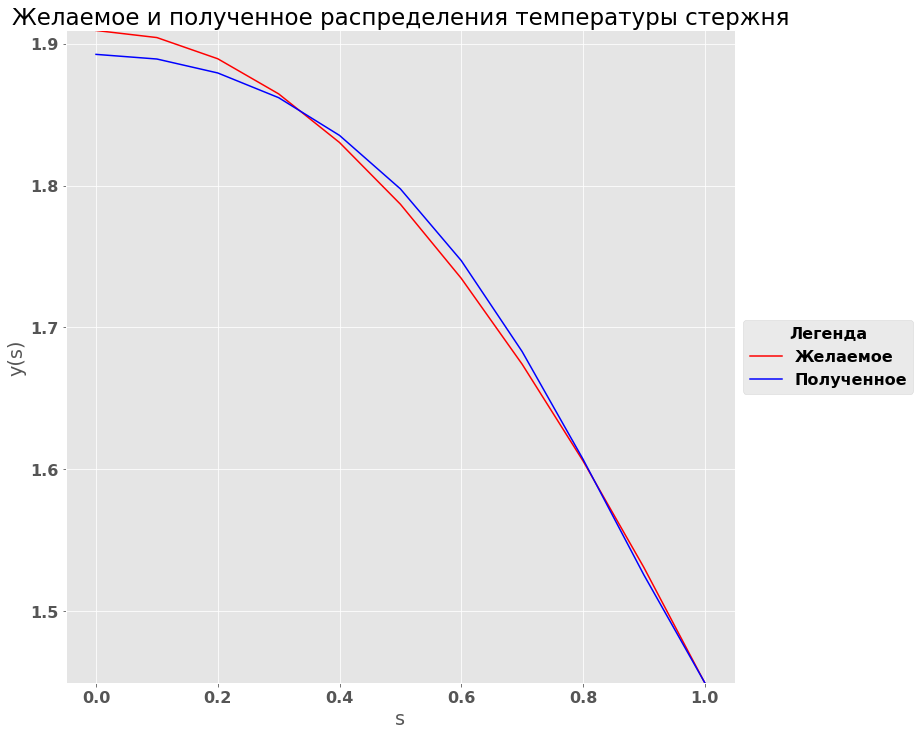

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', label='Желаемое')
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Полученное')
ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Желаемое и полученное распределения температуры стержня')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Управление

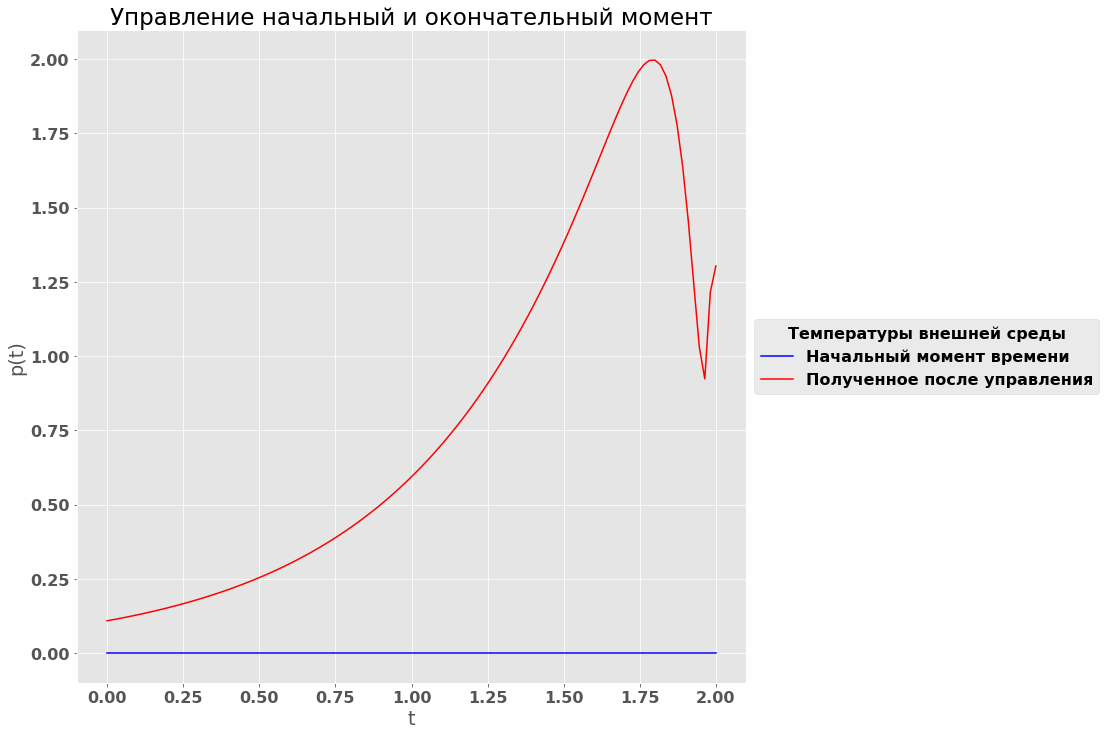

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Y_, model.p_arr[0], color='b', label='Начальный момент времени')
ax.plot(Y_, model.p_arr[-1], color='r', label='Полученное после управления')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Управление начальный и окончательный момент')
plt.legend(title='Температуры внешней среды', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# График изменения ошибки

(9.9997217127811771e-06, 0.10000999972171279)

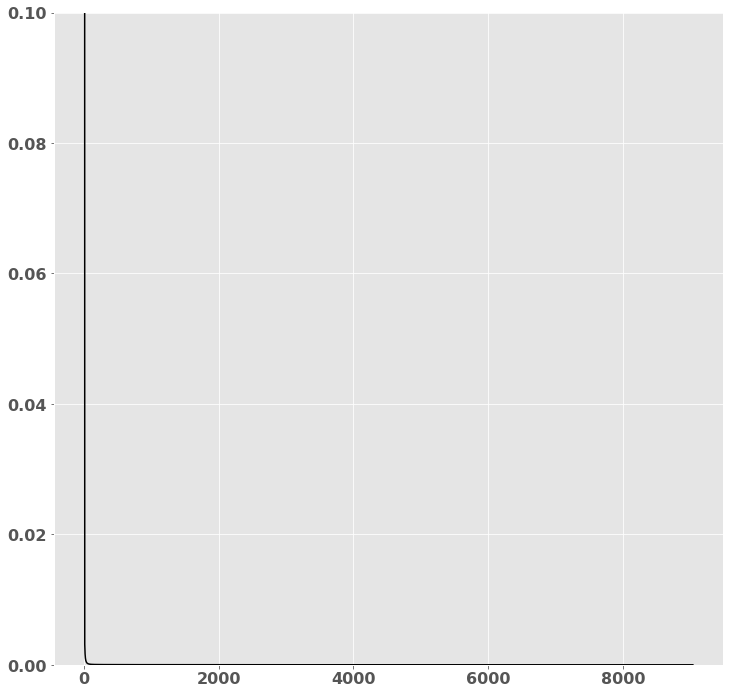

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(model.err, color='black', label='Ошибка')
ax.set_ylim([min(model.err), min(model.err) + .1])